## Problem 144 - Investigating multiple reflections of a laser beam

https://projecteuler.net/problem=144

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def ellipse(x):
    return np.sqrt(100.-4*x*x)

def line(a,b):
    '''Returns the coefficients of a line through 2 points'''
    xa,ya = a
    xb,yb = b
    m = (yb-ya)/(xb-xa)
    q = ya - m*xa
    return m, q

def intersections(m,q):
    '''Returns the intersections between the ellipse 4x^2+y^2 = 100 and the line y=mx+q'''
    a = -m*q
    b = 2.*sqrt(25.*m**2 - q**2 + 100.)
    c = m**2 + 4.
    x1 = (a-b)/c
    x2 = (a+b)/c
    y1 = m*x1+q
    y2 = m*x2+q
    return (x1,y1), (x2,y2)

def tangent(X):
    '''tangent to ellipse in point a = (x,y)'''
    x,y = X
    if y !=0:
        m = -4*x/y
        q = y-m*x
        return m, q
    else:
        return 0 # vertical lines tangent at y=0

def perpendicular(m,q,X):
    '''perpendiculat to y=mx+q passing by a'''
    x,y = X
    if m!=0:
        m1 = -1./m
        q1 = y-m1*x
        return m1, q1
    else:
        return x # vertical line at x

def reflection(X,m,q):
    '''Point reflection across line y=mx+q'''
    x, y = X        
    x1 = ((1-m**2)*x + 2*m*y -2*m*q) / (1+m**2)            
    y1 = (2*m*x + (m**2-1)*y +2*q) / (1+m**2)
    return (x1,y1)
    
def isSamePoint(A,B,tol=1E-8):
    return sum( [ abs(a-b) for a,b in zip(A,B) ] ) < tol 

Exit point = (-0.00984876139181014, 9.99998060036099)
Nbounces = 354


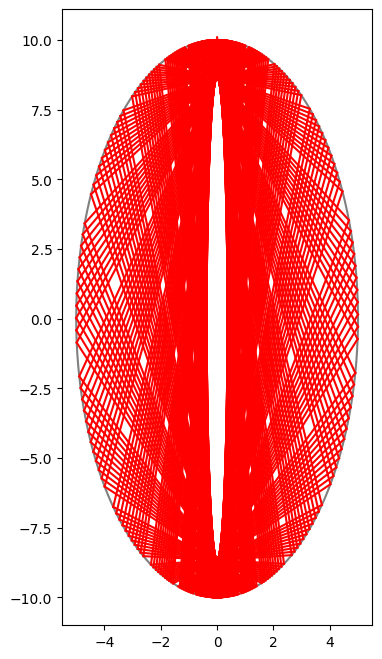

In [7]:
fig, ax = plt.subplots(figsize=(4,8),dpi=100) 

xl = np.linspace(5,-5,1000)
ylu =  ellipse(xl)
yld = -ellipse(xl)
ax.plot(xl,ylu,color="grey")
ax.plot(xl,yld,color="grey")

# starting points
A = (0.,10.1)
B = (1.4,-9.6)

Nbounces = 1

while True:

    #print(A,B)
    
    # line A and B
    m,q = line(A,B)

    x = np.linspace(A[0],B[0],2)
    y = m*x+q
    plt.plot(x,y,color="red")

    # tangent to B
    T = tangent(B)
    if len(T)==2:
        mT, qT = T
        # perpendicular to b
        P = perpendicular(mT,qT,B)
        if len(P)==2:
            mP, qP = P
            # reflect A around P
            A1 = reflection(A,mP,qP)
            # line connecting B and A1
            mR,qR = line(B,A1)
            # intersection with ellipses
            I = intersections(mR,qR)
            # find new B point: A=B, B=B1
            B1 = (0,0)
            for B1 in I:
                if not isSamePoint(B1,B):
                    break
            # check if B1 in open window, otherwise increment bounces and repeat
            if -0.01<B1[0]<0.01 and B1[1]>0:
                print("Exit point =", B1)
                print("Nbounces =", Nbounces)
                break
            else:
                A, B = tuple(B), tuple(B1)
                Nbounces += 1
        #else: # vertical perpendicular at x=0, ignore for now
    #else: # vertical tangents at y=0, ignore for now   

plt.show()